<a href="https://colab.research.google.com/github/lisafranchetti/JET/blob/main/terraced2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from google.colab import files
uploaded = files.upload()


Saving bristol_cleaned_terrace_semi.csv to bristol_cleaned_terrace_semi.csv


In [3]:
df = pd.read_csv('bristol_cleaned_terrace_semi.csv')
df.head()

/tmp/ipython-input-3-1097636094.py:1: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bristol_cleaned_terrace_semi.csv')


,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier
0,280000.0,03/08/2015,BS10 5BS,SEMI-DETACHED,KENDON DRIVE,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,AUGUST,MONDAY,NaN,False,7000.0,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215000.0,08/05/2015,BS48 2AQ,SEMI-DETACHED,SILVER STREET,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,MAY,FRIDAY,NaN,False,5375.0,False
4,93000.0,04/02/2015,BS7 0PU,SEMI-DETACHED,SHERIDAN ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,FEBRUARY,WEDNESDAY,NaN,False,2325.0,False


In [4]:
df = df.dropna(how='all')

In [5]:
df.head()

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier
0,280000.0,03/08/2015,BS10 5BS,SEMI-DETACHED,KENDON DRIVE,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,AUGUST,MONDAY,NaN,False,7000.000,False
3,215000.0,08/05/2015,BS48 2AQ,SEMI-DETACHED,SILVER STREET,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,MAY,FRIDAY,NaN,False,5375.000,False
4,93000.0,04/02/2015,BS7 0PU,SEMI-DETACHED,SHERIDAN ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,FEBRUARY,WEDNESDAY,NaN,False,2325.000,False
6,210000.0,29/05/2015,BS3 5AP,SEMI-DETACHED,RAYMEND WALK,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,MAY,FRIDAY,NaN,False,5250.000,False
7,179995.0,04/06/2015,BS4 4HS,TERRACED,WICK ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,JUNE,THURSDAY,NaN,False,4499.875,False


In [6]:

import re

def extract_postcode_area(postcode):
  match = re.match(r'^[A-Z]{1,2}\d{1,2}[A-Z]?', postcode.strip().upper())
  return match.group(0) if match else None

df['Postcode Area'] = df['Postcode'].astype(str).apply(extract_postcode_area)


In [7]:
df.head()

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier,Postcode Area
0,280000.0,03/08/2015,BS10 5BS,SEMI-DETACHED,KENDON DRIVE,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,AUGUST,MONDAY,NaN,False,7000.000,False,BS10
3,215000.0,08/05/2015,BS48 2AQ,SEMI-DETACHED,SILVER STREET,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,MAY,FRIDAY,NaN,False,5375.000,False,BS48
4,93000.0,04/02/2015,BS7 0PU,SEMI-DETACHED,SHERIDAN ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,FEBRUARY,WEDNESDAY,NaN,False,2325.000,False,BS7
6,210000.0,29/05/2015,BS3 5AP,SEMI-DETACHED,RAYMEND WALK,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,MAY,FRIDAY,NaN,False,5250.000,False,BS3
7,179995.0,04/06/2015,BS4 4HS,TERRACED,WICK ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,JUNE,THURSDAY,NaN,False,4499.875,False,BS4


In [8]:
ts_df = df[['Price', 'Year', 'Postcode Area', 'Property Type']]
ts_df.head()



,Price,Year,Postcode Area,Property Type
0,280000.0,2015.0,BS10,SEMI-DETACHED
3,215000.0,2015.0,BS48,SEMI-DETACHED
4,93000.0,2015.0,BS7,SEMI-DETACHED
6,210000.0,2015.0,BS3,SEMI-DETACHED
7,179995.0,2015.0,BS4,TERRACED


In [24]:

# Define high-value postcodes
high_value_postcodes = ['BS8', 'BS6', 'BS9', 'BS40', 'BS41', 'BS48', 'BS36', 'BS7', 'BS20', 'BS31']


# Filter the DataFrame to include only rows with postcodes in the high-value list
filtered_df = ts_df[ts_df['Postcode Area'].isin(high_value_postcodes)]

# Group by year and calculate total sales count and total price
grouped = filtered_df.groupby('Year').agg(
    Sales_Count=('Price', 'count'),
    Total_Price=('Price', 'sum')
).reset_index()

# Sort by year
grouped = grouped.sort_values('Year').reset_index(drop=True)

# Display the result
print(grouped)

     Year  Sales_Count   Total_Price
0  2015.0         2204  7.726580e+08
1  2016.0         2116  8.331745e+08
2  2017.0         2014  8.391542e+08
3  2018.0         2279  9.594335e+08
4  2019.0         4151  1.735971e+09
5  2020.0         3753  1.640890e+09
6  2021.0         5446  2.522164e+09
7  2022.0         4288  2.172721e+09
8  2023.0         3563  1.770779e+09
9  2024.0         3249  1.607280e+09


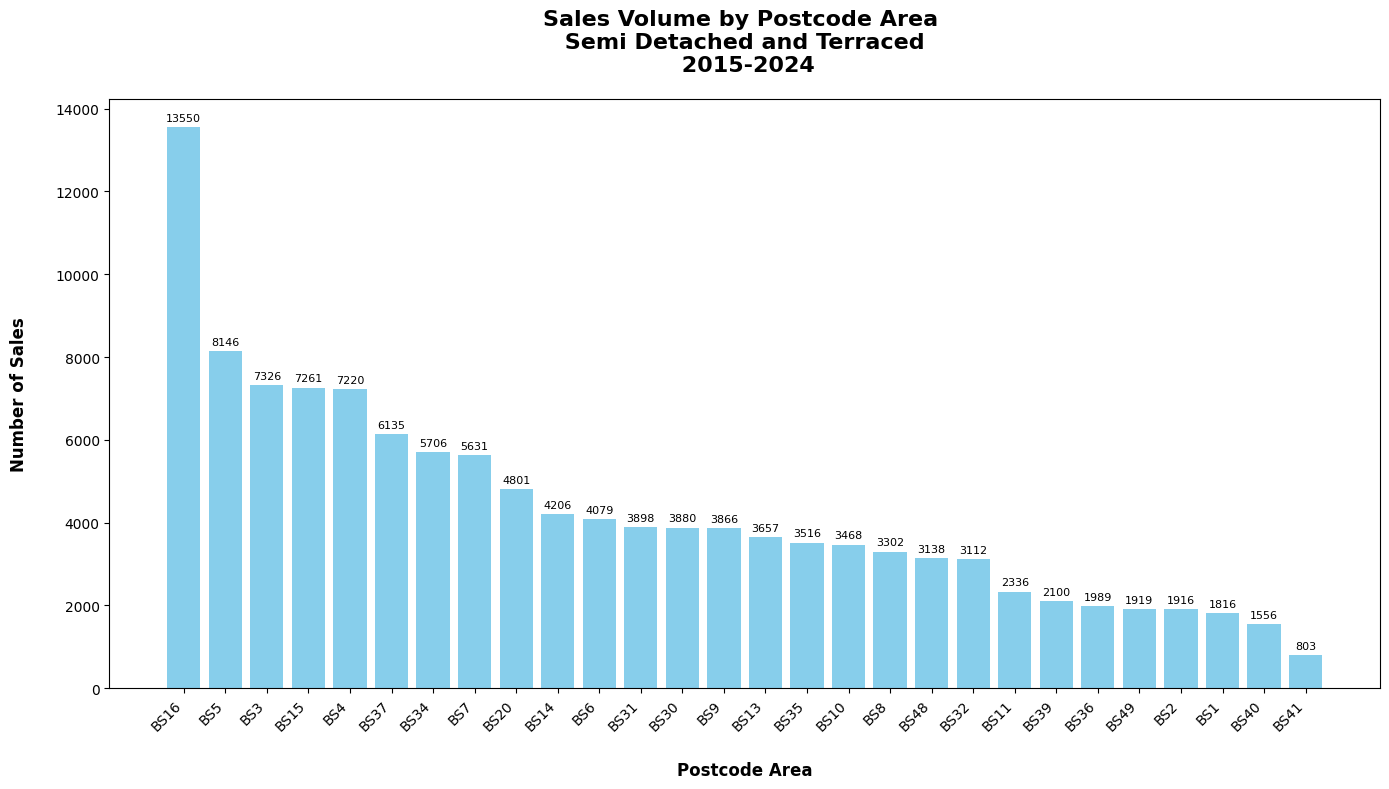

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(sales_volume.index, sales_volume.values, color='skyblue')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Set title and labels using ax methods
ax.set_title('Sales Volume by Postcode Area \n Semi Detached and Terraced \n 2015-2024', fontweight='bold', fontsize=16, pad=20)
ax.set_xlabel('Postcode Area', fontweight='bold', fontsize=12, labelpad=20)
ax.set_ylabel('Number of Sales', fontweight='bold', fontsize=12, labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [12]:

# Group by postcode and calculate sales count and total price
summary = df.groupby('Postcode Area').agg(
  Sales_Count=('Price', 'count'),
  Total_Price=('Price', 'sum')
).reset_index()

# Display the result
print(summary)


   Postcode Area  Sales_Count   Total_Price
0            BS1         1816  6.249855e+08
1           BS10         3468  9.968194e+08
2           BS11         2336  5.629148e+08
3           BS13         3657  8.966142e+08
4           BS14         4206  1.119463e+09
5           BS15         7261  1.901557e+09
6           BS16        13550  4.180482e+09
7            BS2         1916  5.943796e+08
8           BS20         4801  1.810175e+09
9            BS3         7326  2.508291e+09
10          BS30         3880  1.184468e+09
11          BS31         3898  1.414338e+09
12          BS32         3112  9.851237e+08
13          BS34         5706  1.628941e+09
14          BS35         3516  1.227632e+09
15          BS36         1989  7.802750e+08
16          BS37         6135  1.772598e+09
17          BS39         2100  6.707755e+08
18           BS4         7220  2.082708e+09
19          BS40         1556  7.560552e+08
20          BS41          803  3.811523e+08
21          BS48         3138  1

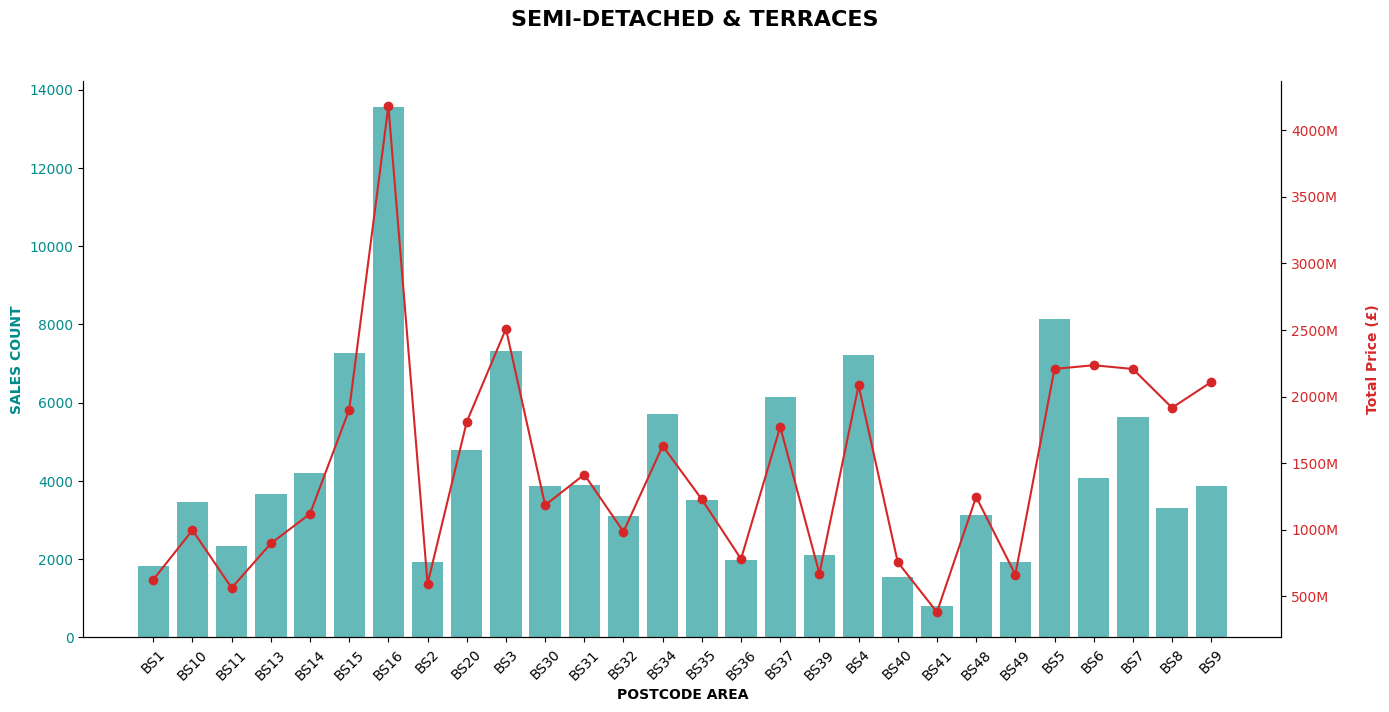

In [13]:
from matplotlib.ticker import FuncFormatter


import matplotlib.ticker as ticker

# Create the DataFrame from the new dataset
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39',
                      'BS4', 'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [1816, 3468, 2336, 3657, 4206, 7261, 13550, 1916, 4801,
                    7326, 3880, 3898, 3112, 5706, 3516, 1989, 6135, 2100,
                    7220, 1556, 803, 3138, 1919, 8146, 4079, 5631, 3302, 3866],
    'Total_Price': [6.249855e+08, 9.968194e+08, 5.629148e+08, 8.966142e+08, 1.119463e+09,
                    1.901557e+09, 4.180482e+09, 5.943796e+08, 1.810175e+09, 2.508291e+09,
                    1.184468e+09, 1.414338e+09, 9.851237e+08, 1.628941e+09, 1.227632e+09,
                    7.802750e+08, 1.772598e+09, 6.707755e+08, 2.082708e+09, 7.560552e+08,
                    3.811523e+08, 1.246491e+09, 6.635662e+08, 2.207213e+09, 2.234667e+09,
                    2.206754e+09, 1.915625e+09, 2.108692e+09]
}

df = pd.DataFrame(data)

# Create a bar chart with dual axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Sales Count
color = 'darkcyan'
ax1.set_xlabel('POSTCODE AREA', fontweight='bold')
ax1.set_ylabel('SALES COUNT', color=color, fontweight='bold')
ax1.bar(df['Postcode Area'], df['Sales_Count'], color=color, alpha=0.6, label='Sales Count')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Total Price
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Price (£)', color=color, fontweight='bold', labelpad=20)
ax2.plot(df['Postcode Area'], df['Total_Price'], color=color, marker='o', label='Total Price')
ax2.tick_params(axis='y', labelcolor=color)

# Format the right-hand y-axis to show values in millions
formatter = FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M')
ax2.yaxis.set_major_formatter(formatter)

# Title and layout
fig.suptitle('SEMI-DETACHED & TERRACES', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)


# Remove background grid lines and top border
ax1.grid(False)
ax2.grid(False)
for spine in ['top']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
# Show the plot
plt.show()




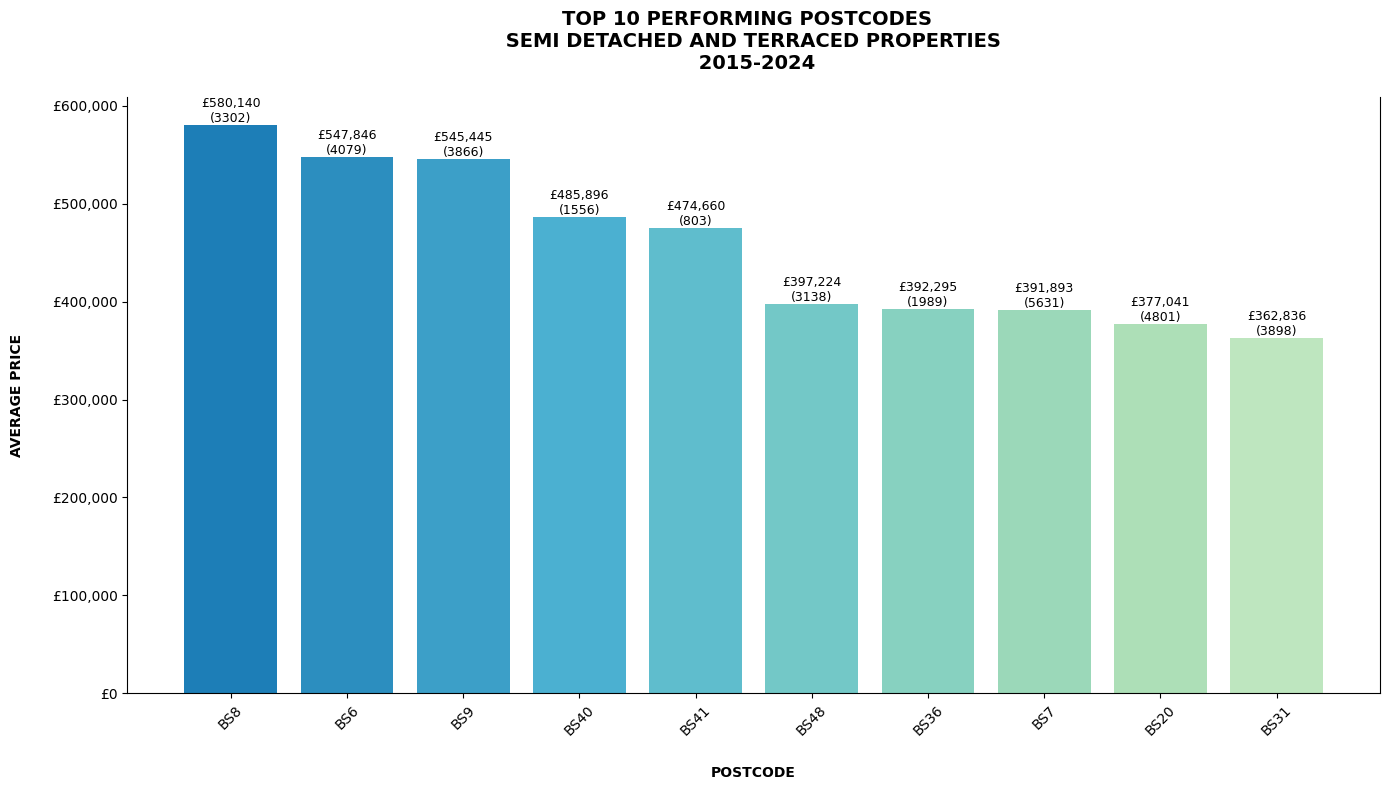

In [22]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

# Create the DataFrame from the new dataset
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39',
                      'BS4', 'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [1816, 3468, 2336, 3657, 4206, 7261, 13550, 1916, 4801,
                    7326, 3880, 3898, 3112, 5706, 3516, 1989, 6135, 2100,
                    7220, 1556, 803, 3138, 1919, 8146, 4079, 5631, 3302, 3866],
    'Total_Price': [6.249855e+08, 9.968194e+08, 5.629148e+08, 8.966142e+08, 1.119463e+09,
                    1.901557e+09, 4.180482e+09, 5.943796e+08, 1.810175e+09, 2.508291e+09,
                    1.184468e+09, 1.414338e+09, 9.851237e+08, 1.628941e+09, 1.227632e+09,
                    7.802750e+08, 1.772598e+09, 6.707755e+08, 2.082708e+09, 7.560552e+08,
                    3.811523e+08, 1.246491e+09, 6.635662e+08, 2.207213e+09, 2.234667e+09,
                    2.206754e+09, 1.915625e+09, 2.108692e+09]
}

df = pd.DataFrame(data)

# Calculate average price
df['Average_Price'] = df['Total_Price'] / df['Sales_Count']

# Get top 10 postcodes by highest average price
top_avg_price_df = df.sort_values(by='Average_Price', ascending=False).head(10)

# Teal gradient colors
colors = plt.cm.GnBu(np.linspace(0.8, 0.3, len(top_avg_price_df)))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_avg_price_df['Postcode Area'], top_avg_price_df['Average_Price'], color=colors)

# Annotate bars
for bar, avg_price, count in zip(bars, top_avg_price_df['Average_Price'], top_avg_price_df['Sales_Count']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"£{int(avg_price):,}\n({count})",
            ha='center', va='bottom', fontsize=9)

# Titles and labels
ax.set_title('TOP 10 PERFORMING POSTCODES  \n SEMI DETACHED AND TERRACED PROPERTIES \n 2015-2024', fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('AVERAGE PRICE', fontweight='bold', labelpad=20)
ax.set_xlabel('POSTCODE', fontweight='bold', labelpad=20)
ax.set_xticks(range(len(top_avg_price_df)))
ax.set_xticklabels(top_avg_price_df['Postcode Area'], rotation=45)
ax.grid(False)
ax.spines['top'].set_visible(False)
# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'£{int(x):,}'))
plt.tight_layout()

plt.show()

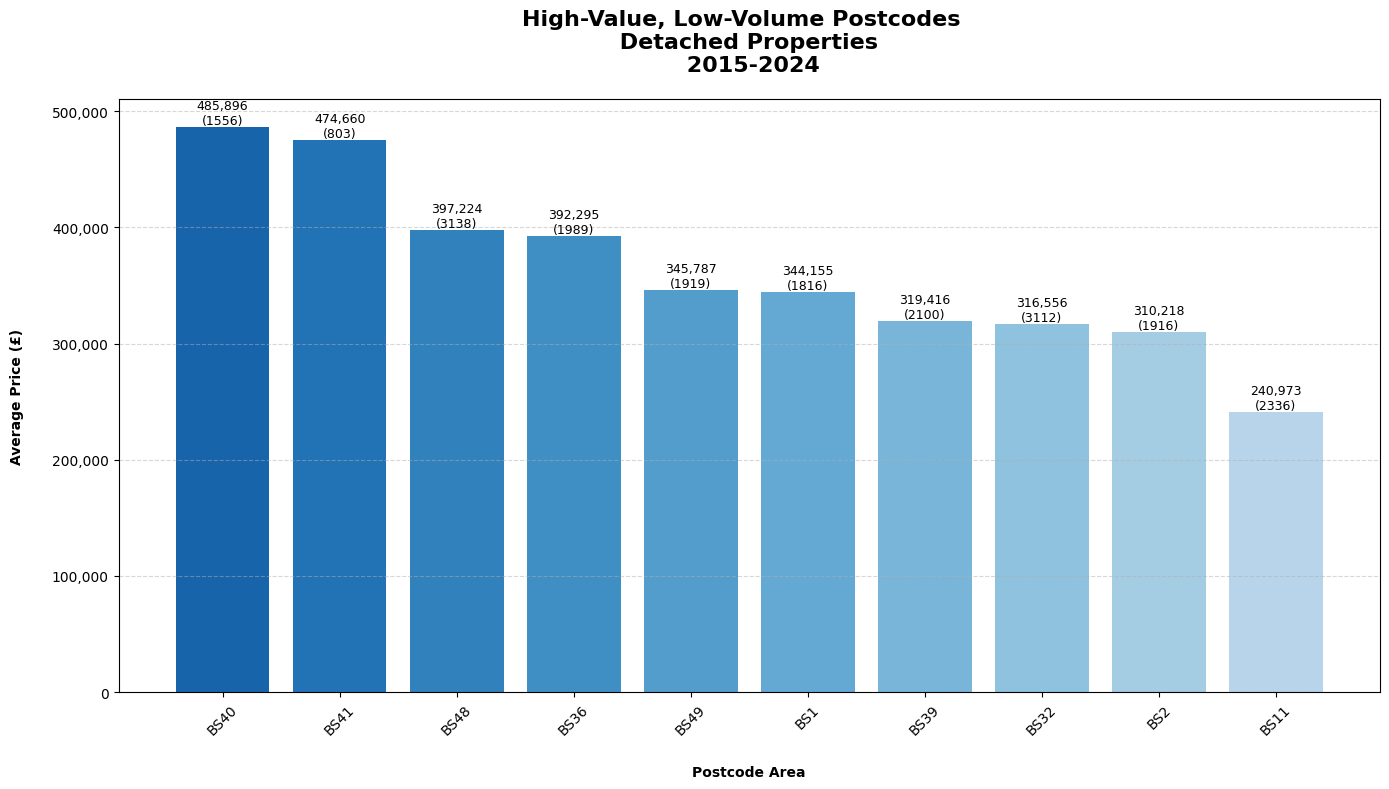

In [ ]:

import matplotlib.ticker as ticker



# Create the DataFrame from the new dataset
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39',
                      'BS4', 'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [1816, 3468, 2336, 3657, 4206, 7261, 13550, 1916, 4801,
                    7326, 3880, 3898, 3112, 5706, 3516, 1989, 6135, 2100,
                    7220, 1556, 803, 3138, 1919, 8146, 4079, 5631, 3302, 3866],
    'Total_Price': [6.249855e+08, 9.968194e+08, 5.629148e+08, 8.966142e+08, 1.119463e+09,
                    1.901557e+09, 4.180482e+09, 5.943796e+08, 1.810175e+09, 2.508291e+09,
                    1.184468e+09, 1.414338e+09, 9.851237e+08, 1.628941e+09, 1.227632e+09,
                    7.802750e+08, 1.772598e+09, 6.707755e+08, 2.082708e+09, 7.560552e+08,
                    3.811523e+08, 1.246491e+09, 6.635662e+08, 2.207213e+09, 2.234667e+09,
                    2.206754e+09, 1.915625e+09, 2.108692e+09]
}
df = pd.DataFrame(data)

# average price
df['Average_Price'] = df['Total_Price'] / df['Sales_Count']

# top 10 postcodes with lowest volume but highest average price
filtered_df = df.sort_values(by=['Sales_Count', 'Average_Price'], ascending=[True, False]).head(10)

# sort by descending average price
filtered_df = filtered_df.sort_values(by='Average_Price', ascending=False)

# blue gradient to coordinate with capgemini colours
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(filtered_df)))

# use Axes object with larger figure size so numbers don't cross the lines
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(filtered_df['Postcode Area'], filtered_df['Average_Price'], color=colors)

# list exact numbers on bars
for bar, avg_price, count in zip(bars, filtered_df['Average_Price'], filtered_df['Sales_Count']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(avg_price):,}\n({count})",
            ha='center', va='bottom', fontsize=9)


ax.set_title('High-Value, Low-Volume Postcodes  \n Semi Deatched and Terraced Properties \n 2015-2024', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Average Price (£)', fontweight='bold', labelpad=20)
ax.set_xlabel('Postcode Area', fontweight='bold', labelpad=20)
ax.set_xticks(range(len(filtered_df)))
ax.set_xticklabels(filtered_df['Postcode Area'], rotation=45)

# thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()
